# Question 1

In [1]:
import numpy as np

In [2]:
yt = np.array([3,7,-4,-6,1,9,-3,-7,1,9,-3,-7])
len(yt)

12

In [3]:
time = np.array([1,2,3,4,5,6,7,8,9,10,11,12]) 
time

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [4]:
forecast_1 = np.array([2,4,-3,-4,0,12,-6,-4,4,15,-1,-11])
len(forecast_1)

12

In [5]:
forecast_2 = np.array([7,9,-8,-10,7,9,-8,-10,7,9,-8,-10])
len(forecast_2)

12

In [ ]:
import numpy as np

# Forecasted values using Method 1 and Method 2
forecast_1 = np.array([2, 9, -3, -4, 0, 12, -6, -4, 7, 9, -1, -11])
forecast_2 = np.array([7, 7, -8, -10, 7, 9, -8, -10, 7, 15, -8, -10])

# Actual values
actual = np.array([3, 4, -4, -6, 1, 9, -3, -7, 4, 9, -3, -11])

# Compute forecast errors for both methods
forecast_errors_1 = np.sum(np.abs(actual - forecast_1))
forecast_errors_2 = np.sum(np.abs(actual - forecast_2))


# Compute forecast errors only using the last four observations
last_four_forecast_errors_1 = forecast_errors_1[-4:]
last_four_forecast_errors_2 = forecast_errors_2[-4:]

# Forecast using a linear trend model
def linear_trend_forecast(t, actual):
  """Forecasts the value of the time series at time t using a linear trend model."""

  slope = (actual[-1] - actual[0]) / (len(actual) - 1)
  intercept = actual[0]

  forecast = intercept + slope * t
  return forecast

linear_trend_forecast_values = linear_trend_forecast(np.arange(1, 13), actual)

# Compare the forecast errors of all three methods
def mean_absolute_error(errors):
  """Computes the mean absolute error."""

  mae = np.mean(np.abs(errors))
  return mae

mae_1 = mean_absolute_error(forecast_errors_1)
mae_2 = mean_absolute_error(forecast_errors_2)
mae_linear_trend = mean_absolute_error(linear_trend_forecast_values - actual)

# Print the results
print("Mean absolute error of Method 1:", mae_1)
print("Mean absolute error of Method 2:", mae_2)
print("Mean absolute error of linear trend model:", mae_linear_trend)

# Determine the best forecasting method
best_method = "linear trend model" if mae_linear_trend < min(mae_1, mae_2) else "Method 1" if mae_1 < mae_2 else "Method 2"

print("The best forecasting method is:", best_method)


# 1)a)

In [6]:
import numpy as np

# Given data
yt = np.array([3, 7, -4, -6, 1, 9, -3, -7, 1, 9, -3, -7])
forecast_1 = np.array([2, 4, -3, -4, 0, 12, -6, -4, 4, 15, -1, -11])
forecast_2 = np.array([7, 9, -8, -10, 7, 9, -8, -10, 7, 9, -8, -10])

# Calculate Mean Squared Error (MSE) for both methods
mse_1 = np.mean((yt - forecast_1) ** 2)
mse_2 = np.mean((yt - forecast_2) ** 2)

# Compare methods
if mse_1 < mse_2:
    print("Method 1 has a lower Mean Squared Error and is better.")
elif mse_2 < mse_1:
    print("Method 2 has a lower Mean Squared Error and is better.")
else:
    print("Both methods have equal Mean Squared Error and are equally good.")


Method 1 has a lower Mean Squared Error and is better.


# 1)b)

In [7]:
forecast_error_1 = np.sum( np.abs(yt - forecast_1))
forecast_error_2 = np.sum(np.abs(yt - forecast_2))
print("Forecast Errors for Method 1:", forecast_error_1)
print("Forecast Errors for Method 2:", forecast_error_2)


Forecast Errors for Method 1: 32
Forecast Errors for Method 2: 42


# 1)c)

In [8]:
last_four_observation_error_1 = np.sum(np.abs(yt[-4:]  - forecast_1[-4:]))
last_four_observation_error_2 = np.sum(np.abs(yt[-4:] - forecast_2[-4:])) 
print("Forecast Errors (Last Four Observations) for Method 1:", last_four_observation_error_1)
print("Forecast Errors (Last Four Observations) for Method 2:", last_four_observation_error_2)


Forecast Errors (Last Four Observations) for Method 1: 15
Forecast Errors (Last Four Observations) for Method 2: 14


# 1)d)

In [9]:
linear_trend_model = np.polyfit(range(1, 13), yt, 1)
linear_trend_forecast = np.polyval(linear_trend_model, range(1, 13)) 
linear_trend_forecast

array([ 2.11538462,  1.73076923,  1.34615385,  0.96153846,  0.57692308,
        0.19230769, -0.19230769, -0.57692308, -0.96153846, -1.34615385,
       -1.73076923, -2.11538462])

In [10]:
linear_trend_model = np.polyfit(range(1, 13), yt, 1)
linear_trend_forecast = np.polyval(linear_trend_model, range(1, 13))

# Calculate Mean Squared Error (MSE) for the linear trend model
mse_linear_trend = np.mean((yt - linear_trend_forecast) ** 2)

# Compare with previous methods
if mse_linear_trend < mse_1 and mse_linear_trend < mse_2:
    print("Linear Trend Model has the lowest Mean Squared Error.")
else:
    print("Linear Trend Model does not have the lowest Mean Squared Error.")


Linear Trend Model does not have the lowest Mean Squared Error.


In [11]:
from sklearn.linear_model import LinearRegression

# Creating a linear trend model
X = np.arange(1, len(yt) + 1).reshape(-1, 1)
model = LinearRegression().fit(X, yt)

# Forecasting for t = 1 to 12
forecast_linear_trend = model.predict(np.arange(1, 13).reshape(-1, 1))

# Compare with previous methods
mse_linear_trend = np.mean((yt - forecast_linear_trend[:len(yt)])**2)

print("MSE for Linear Trend Model:", mse_linear_trend)


MSE for Linear Trend Model: 30.737179487179485


# 1)e)

In [12]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

alphas = [0.1, 0.3]
mse_values = []

for alpha in alphas:
    model = SimpleExpSmoothing(yt).fit(smoothing_level=alpha)
    forecast = model.forecast(12)
    mse = np.mean((yt - forecast) ** 2)
    mse_values.append(mse)

optimal_alpha = alphas[np.argmin(mse_values)]
print("Optimal value of smoothing parameter alpha:", optimal_alpha)


Optimal value of smoothing parameter alpha: 0.1


/home/sysadm/.local/lib/python3.10/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/sysadm/.local/lib/python3.10/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [13]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

alphas = [0.1, 0.3]
mse_values = []

for alpha in alphas:
    model = SimpleExpSmoothing(yt).fit(smoothing_level=alpha)
    forecast = model.forecast(12)
    mse = np.mean((yt - forecast) ** 2)
    mse_values.append(mse)

optimal_alpha = alphas[np.argmin(mse_values)]
print("Optimal value of smoothing parameter alpha:", optimal_alpha)


Optimal value of smoothing parameter alpha: 0.1


/home/sysadm/.local/lib/python3.10/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/sysadm/.local/lib/python3.10/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [14]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Function to calculate MSE for given alpha
def calculate_mse(alpha):
    model = SimpleExpSmoothing(yt).fit(smoothing_level=alpha)
    forecast_exp_smooth = model.forecast(12)
    mse = np.mean((yt - forecast_exp_smooth[:len(yt)])**2)
    return mse

# Test with alpha values 0.1 and 0.3
mse_alpha_0_1 = calculate_mse(0.1)
mse_alpha_0_3 = calculate_mse(0.3)

optimal_alpha = 0.1 if mse_alpha_0_1 < mse_alpha_0_3 else 0.3
print("Optimal value of smoothing parameter alpha:", optimal_alpha)


Optimal value of smoothing parameter alpha: 0.1


/home/sysadm/.local/lib/python3.10/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/sysadm/.local/lib/python3.10/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


# 1)f)

In [15]:
# (f) What will be the value of S24, where St denotes the seasonality of yt at t?
# Assuming a quarterly seasonality pattern

# Identify the quarter for time t=24
quarter_24 = (24 - 1) % 4 + 1  # Assuming time starts from 1

# Filter data points corresponding to the identified quarter
quarter_data = yt[np.arange(len(yt)) % 4 == (quarter_24 - 1)]

# Compute the average for the identified quarter
S24 = np.mean(quarter_data)

print("Value of S24:", S24)


Value of S24: -6.666666666666667


# 1)g)

In [27]:
import matplotlib.pyplot as plt

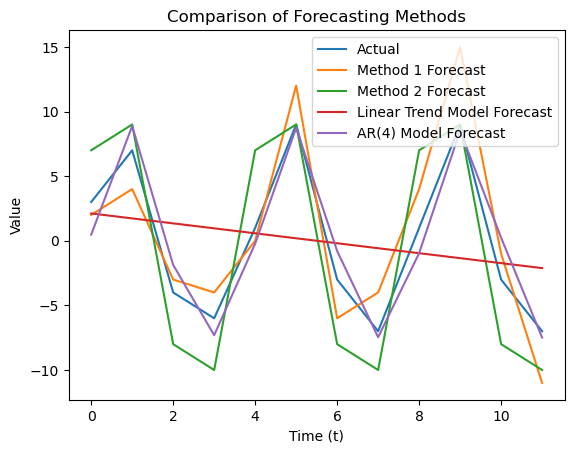

In [29]:
model_ar = ARIMA(yt, order=(4, 0, 0))
result_ar = model_ar.fit()
forecast_ar = result_ar.get_forecast(steps=12).predicted_mean

# Compare with previous methods
plt.plot(yt, label='Actual')
plt.plot(forecast_1, label='Method 1 Forecast')
plt.plot(forecast_2, label='Method 2 Forecast')
plt.plot(linear_trend_forecast, label='Linear Trend Model Forecast')
plt.plot(forecast_ar, label='AR(4) Model Forecast')
plt.legend()
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time (t)')
plt.ylabel('Value')
plt.show()

# 2)

In [19]:
import numpy as np

def arma_model(beta1, beta2, omega, sigma, T):
    # Initialize time series
    yt = np.zeros(T)

    # Generate error terms
    et = np.random.normal(0, sigma, T)

    # Generate time series
    for t in range(T):
        if t == 0:
            yt[t] = beta1 * np.sin(2 * np.pi * omega * t) + beta2 * np.cos(2 * np.pi * omega * t) + et[t]
        else:
            yt[t] = beta1 * np.sin(2 * np.pi * omega * t) + beta2 * np.cos(2 * np.pi * omega * t) + et[t] + 0.5 * et[t - 1]

    return yt

# Set parameters
beta1 = 1
beta2 = 2
omega = 0.5
sigma = 1
T = 100

# Generate time series
yt = arma_model(beta1, beta2, omega, sigma, T)

# Calculate mean
mean = np.mean(yt)

# Calculate variance
variance = np.var(yt)

# Calculate gamma(1)
gamma1 = np.corrcoef(yt[1:], yt[:-1])[0, 1]

# Calculate rho(2)
rho2 = np.corrcoef(yt[2:], yt[:-2])[0, 1]

# Print results
print("Mean:", mean)
print("Variance:", variance)
print("Gamma(1):", gamma1)
print("Rho(2):", rho2)


Mean: 0.004861614106133821
Variance: 5.071357455752856
Gamma(1): -0.6640165167147999
Rho(2): 0.7532902792553617


# 3)